![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [265]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [266]:
import numpy as np

bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

crimes["Vict Age Group"] = pd.cut(crimes["Vict Age"], bins=bins, labels=labels, right=True)

print(crimes["Vict Age Group"].value_counts().sort_index())


0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: Vict Age Group, dtype: int64


In [267]:
victim_ages = crimes["Vict Age Group"].value_counts().sort_index()
print(victim_ages)


0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: Vict Age Group, dtype: int64


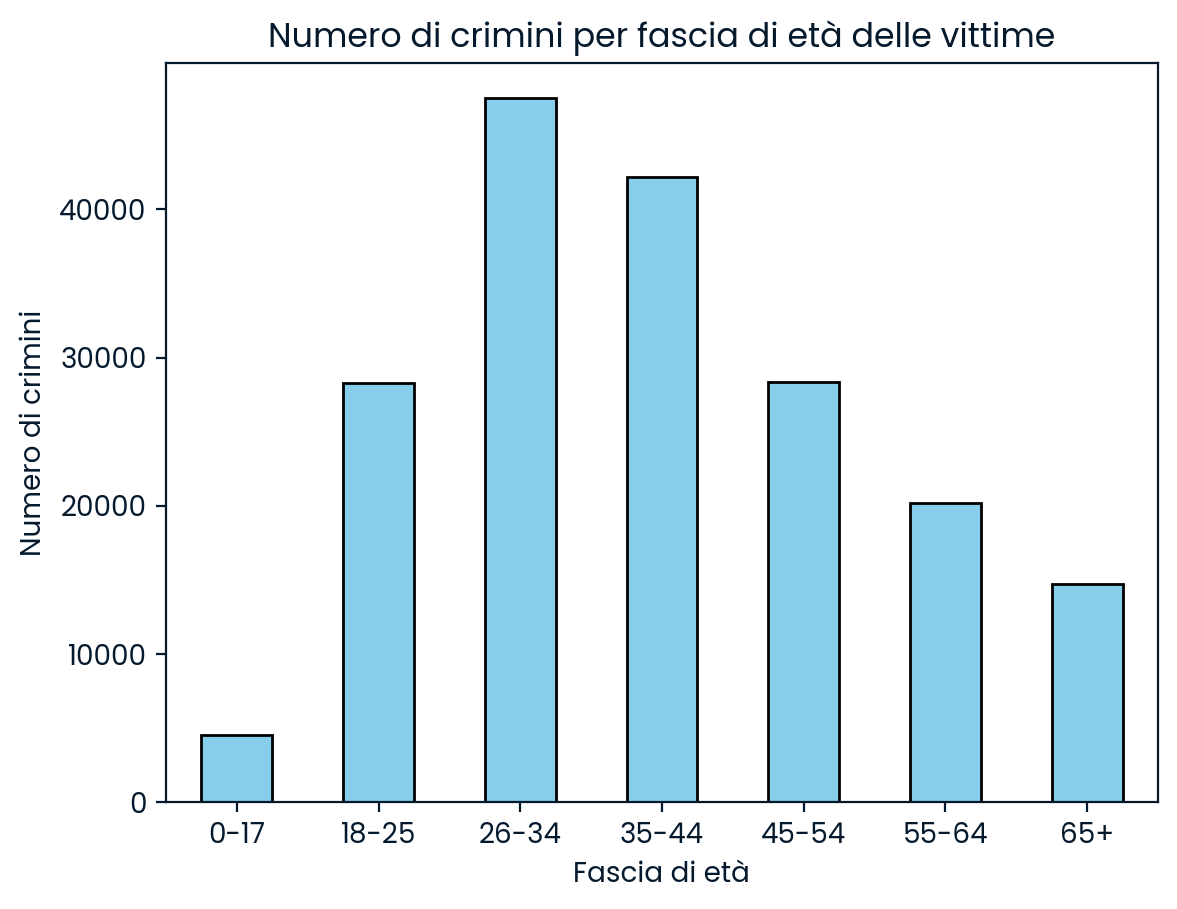

In [268]:
import matplotlib.pyplot as plt

victim_ages.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Numero di crimini per fascia di età delle vittime")
plt.xlabel("Fascia di età")
plt.ylabel("Numero di crimini")
plt.xticks(rotation=0)
plt.show()

In [269]:
# Ensure TIME OCC is numeric
crimes["TIME OCC"] = crimes["TIME OCC"].astype(int)

# Extract the hour (integer 0–23)
crimes["HOUR"] = crimes["TIME OCC"] // 100

# Count crimes per hour
conteggio_ore = crimes["HOUR"].value_counts().sort_index()
print(conteggio_ore)

# Find the hour with the most crimes
peak_crime_hour = conteggio_ore.idxmax()
print(f"The hour with the highest crime frequency is: {peak_crime_hour}")


0      8728
1      5836
2      4726
3      3943
4      3238
5      3171
6      5621
7      5403
8      7523
9      7092
10     8440
11     8787
12    13663
13     8474
14     8872
15     9393
16     9224
17     9964
18    10125
19     9262
20     9579
21     8701
22     8531
23     7419
Name: HOUR, dtype: int64
The hour with the highest crime frequency is: 12


In [271]:
night_crimes = crimes[(crimes["HOUR"] >= 0) & (crimes["HOUR"] <= 4)]
conteggio_area = night_crimes["AREA NAME"].value_counts().sort_index()
peak_night_crime_location = conteggio_area.idxmax()
peak_night_crime_location

'Central'

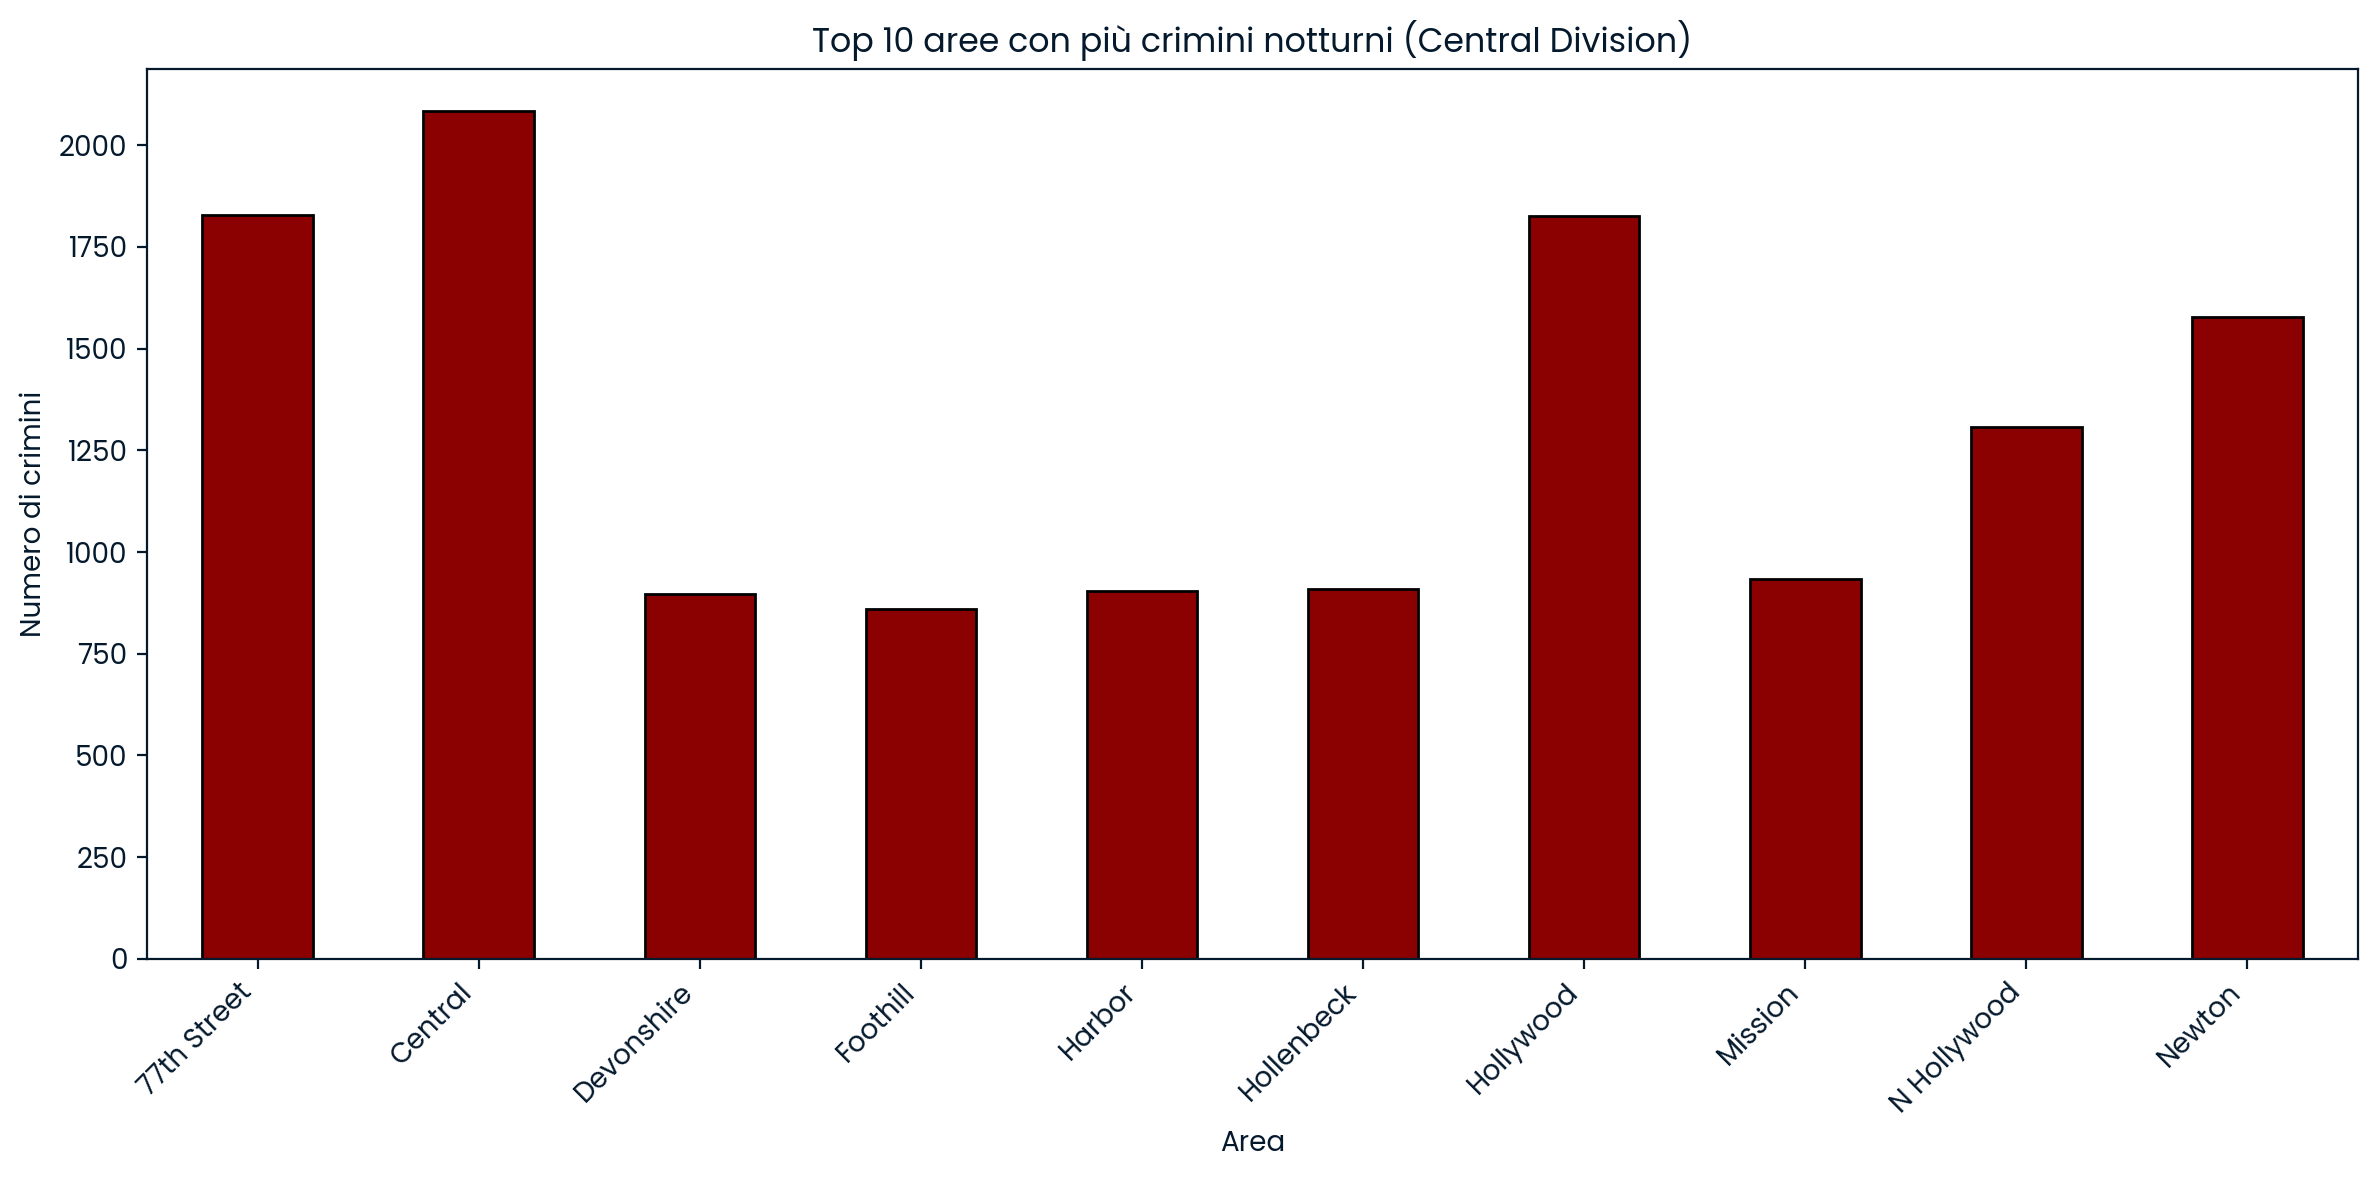

In [275]:
import matplotlib.pyplot as plt

# Prendo le 10 strade più colpite
top_aree = conteggio_area.head(10)

# Grafico a barre
top_aree.plot(kind="bar", figsize=(12,6), color="darkred", edgecolor="black")

plt.title("Top 10 aree con più crimini notturni (Central Division)")
plt.xlabel("Area")
plt.ylabel("Numero di crimini")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [273]:
conteggio_strade = central_streets_nights["LOCATION"].value_counts()

strada_top = conteggio_strade.idxmax()
num_crimini_street = conteggio_strade.max()

print(f"La street con più crimini notturni di {area_top} è: {strada_top} ({num_crimini_street} crimini)")

La street con più crimini notturni di Central è: 600 S  SPRING                       ST (77 crimini)


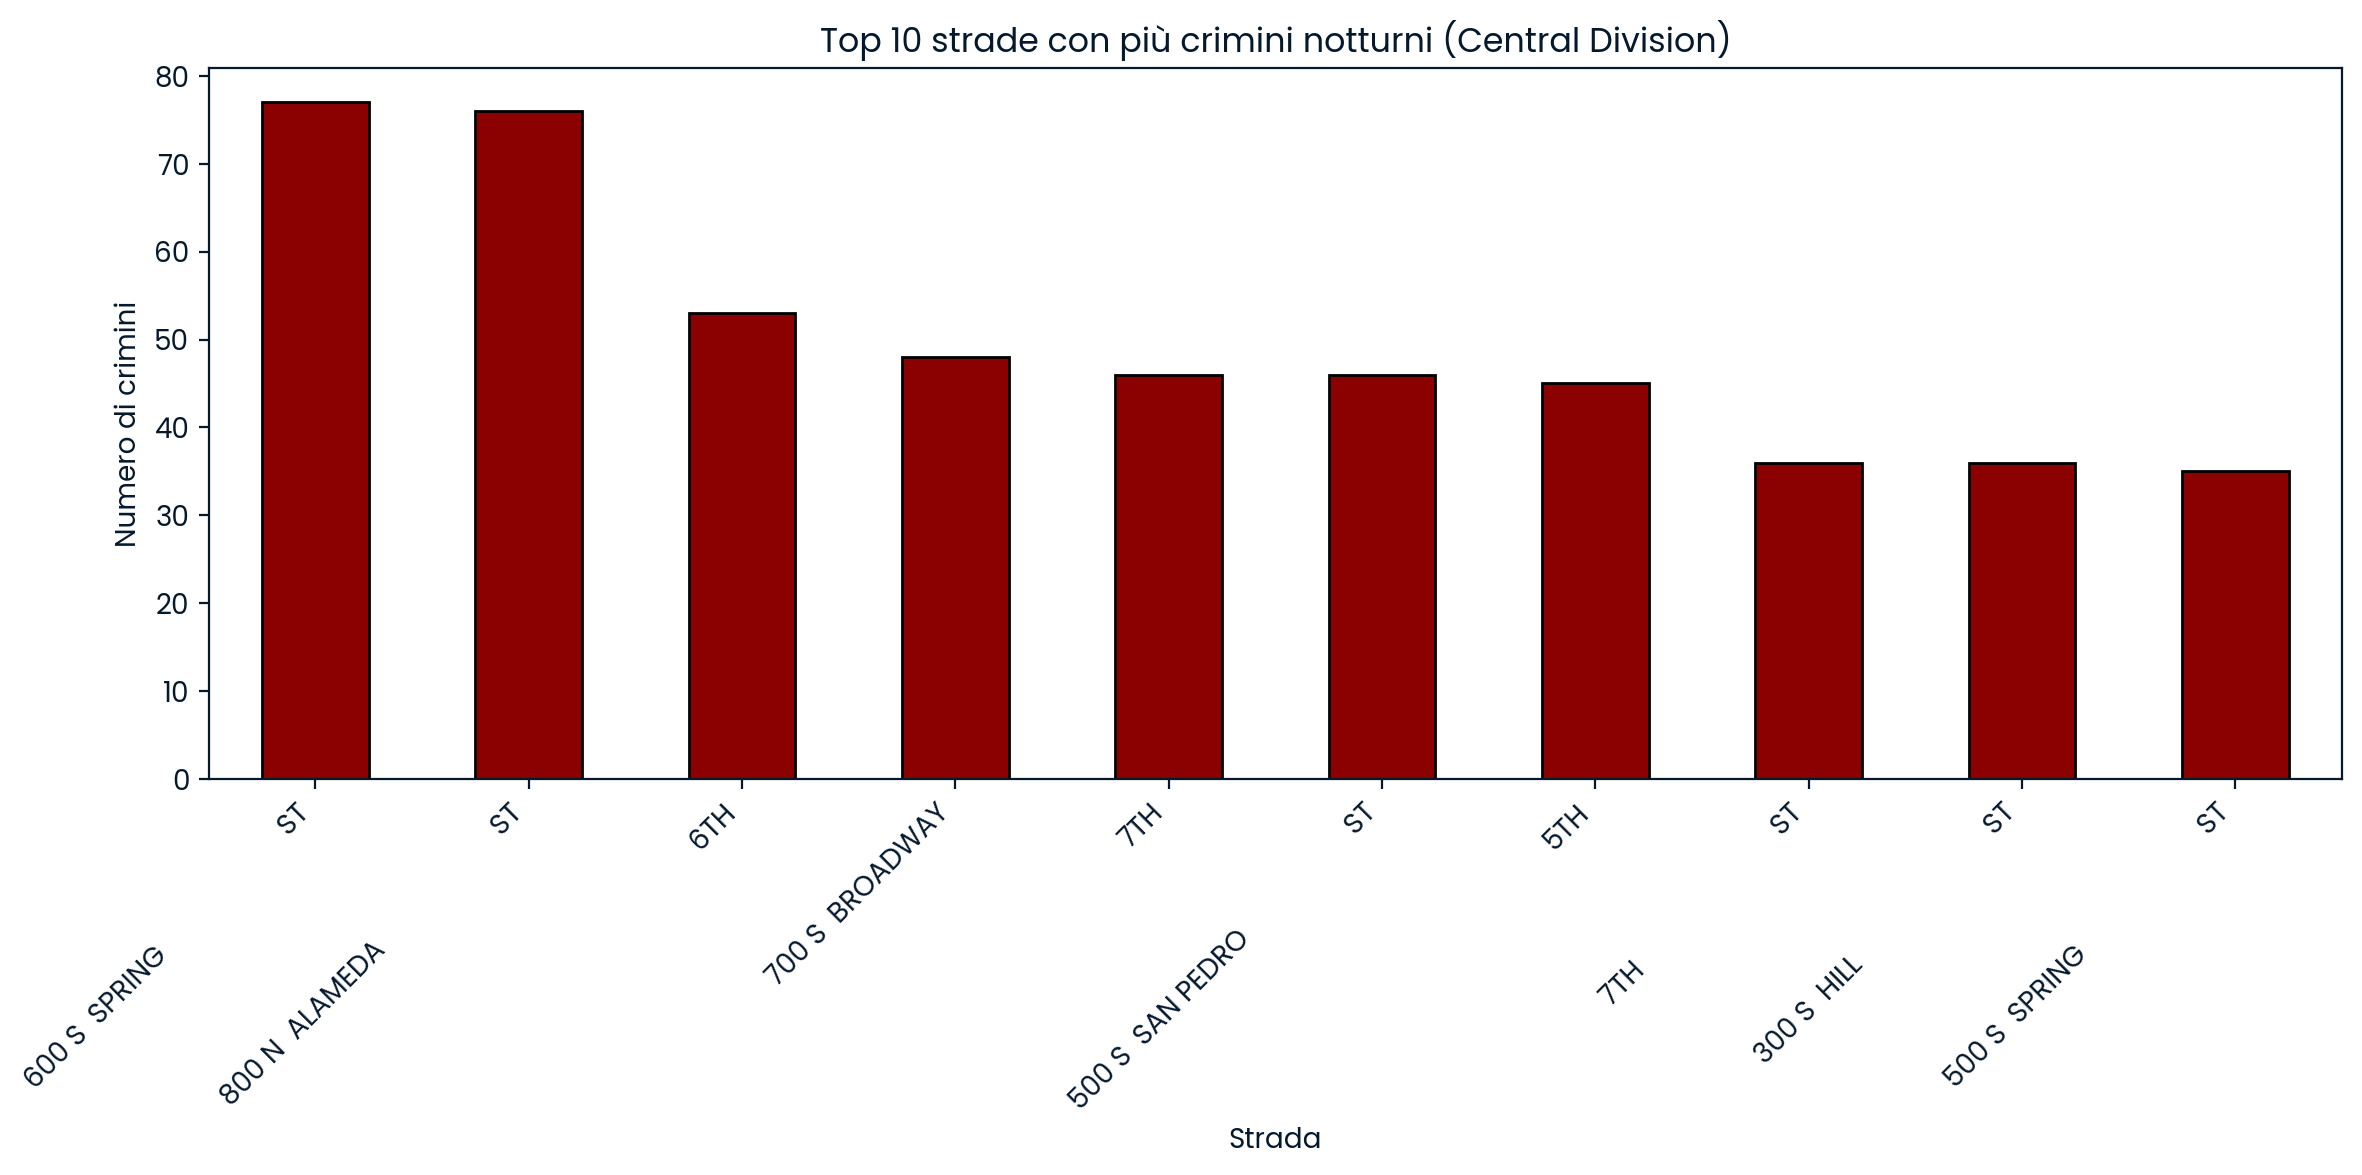

In [274]:
import matplotlib.pyplot as plt

# Prendo le 10 strade più colpite
top_streets = conteggio_strade.head(10)

# Grafico a barre
top_streets.plot(kind="bar", figsize=(12,6), color="darkred", edgecolor="black")

plt.title(f"Top 10 strade con più crimini notturni ({area_top} Division)")
plt.xlabel("Strada")
plt.ylabel("Numero di crimini")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
